# Deep Learning with Keras

## Lets walk through building a very simple Deep Neural Network for our Tabular datasets.

## First, lets take a quick walk-through of Keras.

## Tabular Data

## I've copied all of my functions that loaded and visualized the data from from my previous notbook into a module, so that I can use them here:

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
import pandas as pd

# Define the file path in your Google Drive
file_path = '/content/drive/My Drive/stock_prices.csv'

# Read the CSV file into a DataFrame
stock_prices_df = pd.read_csv(file_path)


In [9]:
num_rows, num_features = stock_prices_df.shape

print("Number of rows (data points):", num_rows)
print("Number of features:", num_features)

Number of rows (data points): 2332531
Number of features: 12


In [10]:

missing_values = stock_prices_df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
RowId                     0
Date                      0
SecuritiesCode            0
Open                   7608
High                   7608
Low                    7608
Close                  7608
Volume                    0
AdjustmentFactor          0
ExpectedDividend    2313666
SupervisionFlag           0
Target                  238
dtype: int64


In [11]:
# Create an empty list to store feature summaries
feature_summaries = []

# Loop through each column in the DataFrame
for column in stock_prices_df.columns:
    # Determine the type of the feature (categorical or numerical)
    if stock_prices_df[column].dtype == 'object':
        feature_type = 'Categorical'
        values_range = ', '.join(stock_prices_df[column].unique())
    else:
        feature_type = 'Numerical'
        values_range = f'Range: [{stock_prices_df[column].min()}, {stock_prices_df[column].max()}]'

    # Count the number of missing values
    missing_values = stock_prices_df[column].isnull().sum()

    # Define outlier (this is just an example, you can define it based on your dataset)
    outlier_definition = 'Values beyond 3 standard deviations from mean (for numerical features)'

    # Add the feature summary to the list
    feature_summaries.append({'Feature Name': column,
                              'Type': feature_type,
                              'Values/Range': values_range,
                              'Missing Values': missing_values,
                              'Outliers Definition': outlier_definition})

# Create a DataFrame from the list of feature summaries
feature_summary = pd.DataFrame(feature_summaries)

# Display the feature summary table
feature_summary

,Feature Name,Type,Values/Range,Missing Values,Outliers Definition
0,RowId,Categorical,"20170104_1301, 20170104_1332, 20170104_1333, 2...",0,Values beyond 3 standard deviations from mean ...
1,Date,Categorical,"2017-01-04, 2017-01-05, 2017-01-06, 2017-01-10...",0,Values beyond 3 standard deviations from mean ...
2,SecuritiesCode,Numerical,"Range: [1301, 9997]",0,Values beyond 3 standard deviations from mean ...
3,Open,Numerical,"Range: [14.0, 109950.0]",7608,Values beyond 3 standard deviations from mean ...
4,High,Numerical,"Range: [15.0, 110500.0]",7608,Values beyond 3 standard deviations from mean ...
5,Low,Numerical,"Range: [13.0, 107200.0]",7608,Values beyond 3 standard deviations from mean ...
6,Close,Numerical,"Range: [14.0, 109550.0]",7608,Values beyond 3 standard deviations from mean ...
7,Volume,Numerical,"Range: [0, 643654000]",0,Values beyond 3 standard deviations from mean ...
8,AdjustmentFactor,Numerical,"Range: [0.1, 20.0]",0,Values beyond 3 standard deviations from mean ...
9,ExpectedDividend,Numerical,"Range: [0.0, 1070.0]",2313666,Values beyond 3 standard deviations from mean ...


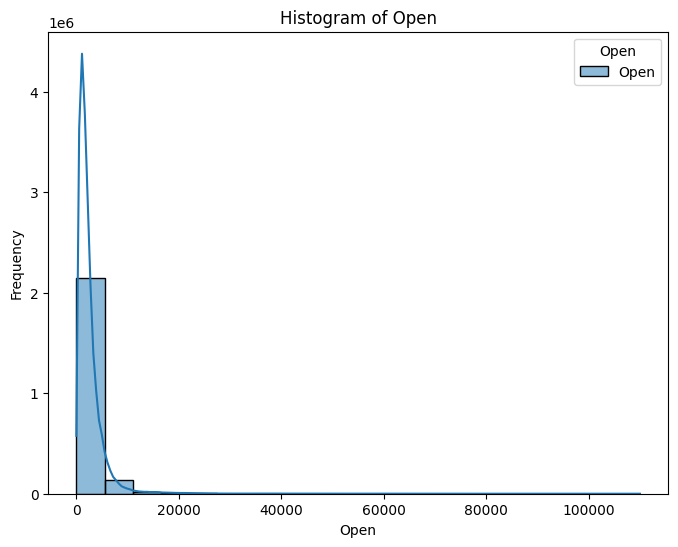

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=stock_prices_df, x='Open', kde=True, bins=20, label='Open')
plt.title('Histogram of Open')
plt.xlabel('Open')
plt.ylabel('Frequency')
plt.legend(title='Open')
plt.show()


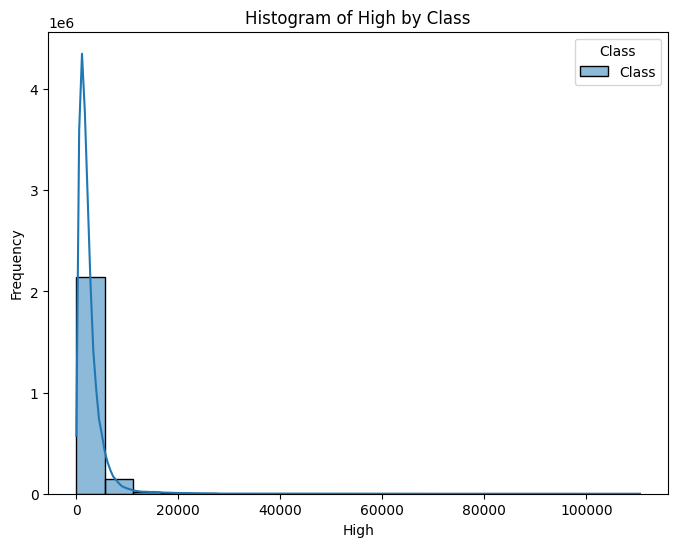

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.histplot(data=stock_prices_df, x='High',kde=True, bins=20, label='Class')
plt.title('Histogram of High by Class')
plt.xlabel('High')
plt.ylabel('Frequency')
plt.legend(title='Class')
plt.show()


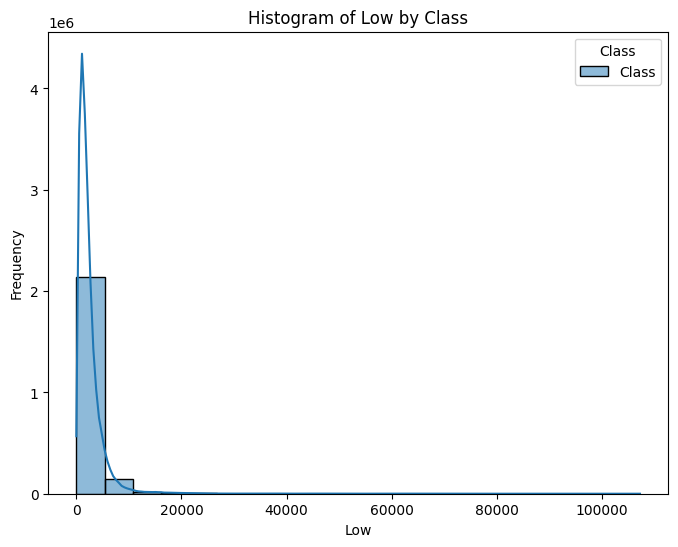

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.histplot(data=stock_prices_df, x='Low',  kde=True, bins=20, label='Class')
plt.title('Histogram of Low by Class')
plt.xlabel('Low')
plt.ylabel('Frequency')
plt.legend(title='Class')
plt.show()


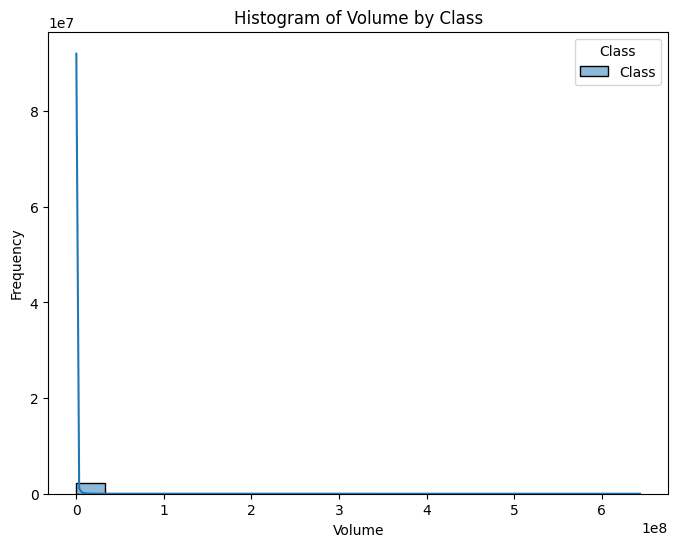

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.histplot(data=stock_prices_df, x='Volume',  kde=True, bins=20, label='Class')
plt.title('Histogram of Volume by Class')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.legend(title='Class')
plt.show()


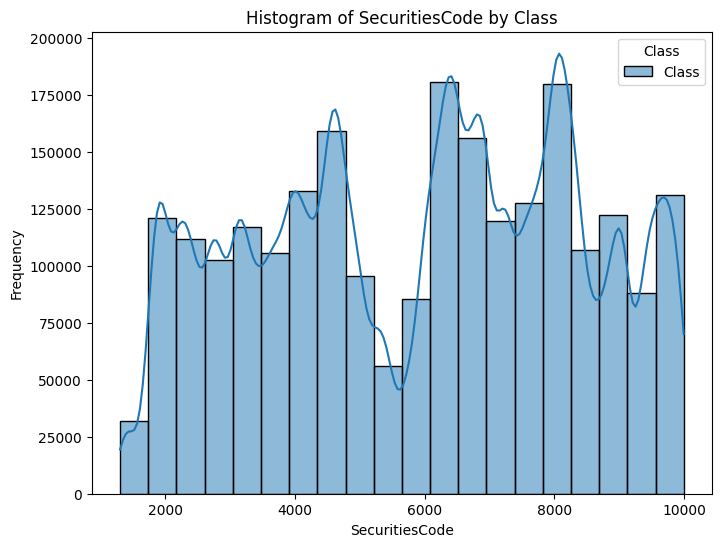

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.histplot(data=stock_prices_df, x='SecuritiesCode', kde=True, bins=20, label='Class')
plt.title('Histogram of SecuritiesCode by Class')
plt.xlabel('SecuritiesCode')
plt.ylabel('Frequency')
plt.legend(title='Class')
plt.show()

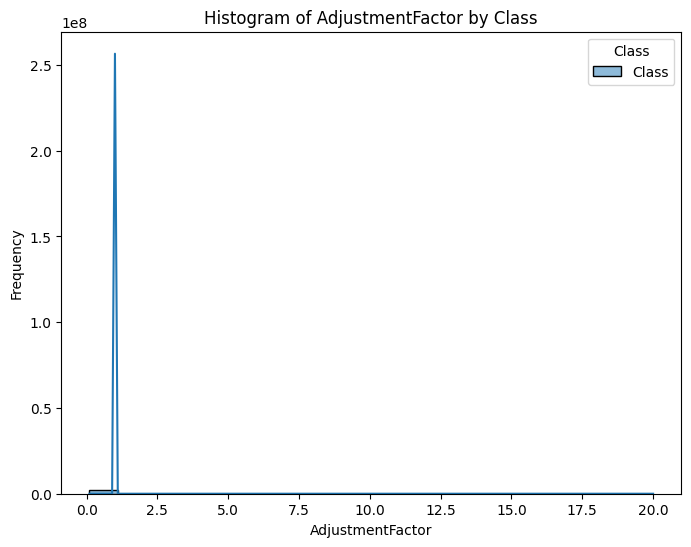

In [16]:
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.histplot(data=stock_prices_df, x='AdjustmentFactor', kde=True, bins=20, label='Class')
plt.title('Histogram of AdjustmentFactor by Class')
plt.xlabel('AdjustmentFactor')
plt.ylabel('Frequency')
plt.legend(title='Class')
plt.show()

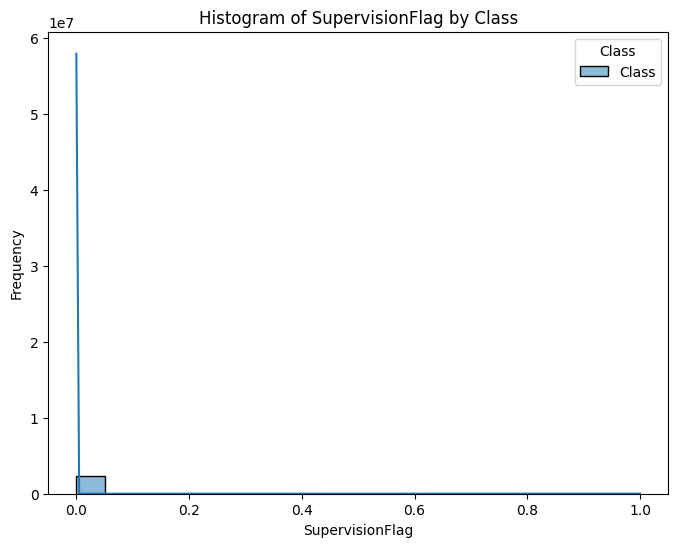

In [17]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import seaborn as sns


plt.figure(figsize=(8, 6))
sns.histplot(data=stock_prices_df, x='SupervisionFlag',  kde=True, bins=20, label='Class')
plt.title('Histogram of SupervisionFlag by Class')
plt.xlabel('SupervisionFlag')
plt.ylabel('Frequency')
plt.legend(title='Class')
plt.show()


In [12]:
# Display basic information about the dataset
df_info = stock_prices_df.info()

# Display the first few rows of the dataset
df_head = stock_prices_df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   RowId             object 
 1   Date              object 
 2   SecuritiesCode    int64  
 3   Open              float64
 4   High              float64
 5   Low               float64
 6   Close             float64
 7   Volume            int64  
 8   AdjustmentFactor  float64
 9   ExpectedDividend  float64
 10  SupervisionFlag   bool   
 11  Target            float64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 198.0+ MB


(None,
            RowId        Date  SecuritiesCode    Open    High     Low   Close  \
 0  20170104_1301  2017-01-04            1301  2734.0  2755.0  2730.0  2742.0   
 1  20170104_1332  2017-01-04            1332   568.0   576.0   563.0   571.0   
 2  20170104_1333  2017-01-04            1333  3150.0  3210.0  3140.0  3210.0   
 3  20170104_1376  2017-01-04            1376  1510.0  1550.0  1510.0  1550.0   
 4  20170104_1377  2017-01-04            1377  3270.0  3350.0  3270.0  3330.0   
 
     Volume  AdjustmentFactor  ExpectedDividend  SupervisionFlag    Target  
 0    31400               1.0               NaN            False  0.000730  
 1  2798500               1.0               NaN            False  0.012324  
 2   270800               1.0               NaN            False  0.006154  
 3    11300               1.0               NaN            False  0.011053  
 4   150800               1.0               NaN            False  0.003026  )

In [13]:
import pandas as pd

# To make my life easier so I don't have to type out a longer variable name
df = stock_prices_df

In [14]:
unique_row_ids = stock_prices_df['RowId'].nunique() == len(stock_prices_df['RowId'])
unique_row_ids


True

In [15]:

######### Understanding the distribution of categorical variables.

# Value counts for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for RowId:
RowId
20170104_1301    1
20200430_8876    1
20200430_8848    1
20200430_8850    1
20200430_8860    1
                ..
20180831_8715    1
20180831_8714    1
20180831_8713    1
20180831_8708    1
20211203_9997    1
Name: count, Length: 2332531, dtype: int64

Value counts for Date:
Date
2021-12-03    2000
2021-04-08    2000
2021-04-27    2000
2021-04-26    2000
2021-04-23    2000
              ... 
2017-02-08    1865
2017-02-07    1865
2017-02-06    1865
2017-02-03    1865
2017-01-04    1865
Name: count, Length: 1202, dtype: int64



In [16]:
# Check data types of each column
data_types = df.dtypes
print(data_types)

RowId                object
Date                 object
SecuritiesCode        int64
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
AdjustmentFactor    float64
ExpectedDividend    float64
SupervisionFlag        bool
Target              float64
dtype: object


In [17]:

# Check data types

# Check data types
data_types = df.dtypes

# Print data types along with additional information
print("Data Types and Additional Information:")
for column in df.columns:
    print(f"Column: {column}")
    print(f" - Data Type: {data_types[column]}")
    print(f" - Number of Unique Values: {df[column].nunique()}")
    print(f" - Sample Values: {df[column].dropna().unique()[:5]}")  # Display first 5 unique non-null values
    print()

Data Types and Additional Information:
Column: RowId
 - Data Type: object
 - Number of Unique Values: 2332531
 - Sample Values: ['20170104_1301' '20170104_1332' '20170104_1333' '20170104_1376'
 '20170104_1377']

Column: Date
 - Data Type: object
 - Number of Unique Values: 1202
 - Sample Values: ['2017-01-04' '2017-01-05' '2017-01-06' '2017-01-10' '2017-01-11']

Column: SecuritiesCode
 - Data Type: int64
 - Number of Unique Values: 2000
 - Sample Values: [1301 1332 1333 1376 1377]

Column: Open
 - Data Type: float64
 - Number of Unique Values: 23067
 - Sample Values: [2734.  568. 3150. 1510. 3270.]

Column: High
 - Data Type: float64
 - Number of Unique Values: 23960
 - Sample Values: [2755.  576. 3210. 1550. 3350.]

Column: Low
 - Data Type: float64
 - Number of Unique Values: 23904
 - Sample Values: [2730.  563. 3140. 1510. 3270.]

Column: Close
 - Data Type: float64
 - Number of Unique Values: 24046
 - Sample Values: [2742.  571. 3210. 1550. 3330.]

Column: Volume
 - Data Type: int6

In [18]:
import pandas as pd

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])



In [19]:
# Check the data types of each column
data_types = df.dtypes
print(data_types)

RowId                       object
Date                datetime64[ns]
SecuritiesCode               int64
Open                       float64
High                       float64
Low                        float64
Close                      float64
Volume                       int64
AdjustmentFactor           float64
ExpectedDividend           float64
SupervisionFlag               bool
Target                     float64
dtype: object


In [20]:
invalid_entries = df[df.select_dtypes(include=['number']) < 0].count()
print("Invalid Entries:\n", invalid_entries)


Invalid Entries:
 RowId                     0
Date                      0
SecuritiesCode            0
Open                      0
High                      0
Low                       0
Close                     0
Volume                    0
AdjustmentFactor          0
ExpectedDividend          0
SupervisionFlag           0
Target              1122701
dtype: int64


In [21]:

# Check for duplicate records
duplicates = df.duplicated().sum()
print("Number of Duplicate Records:", duplicates)

Number of Duplicate Records: 0


KeyboardInterrupt: 

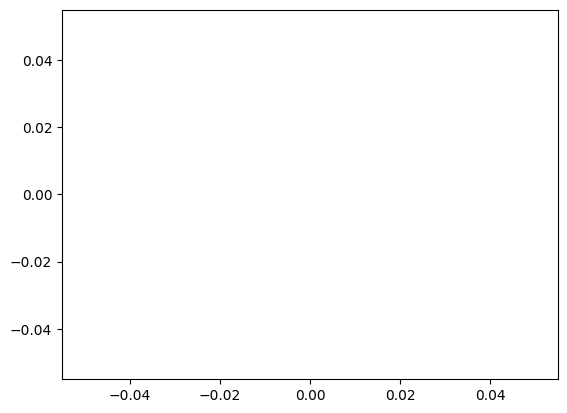

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms and density plots for numerical variables
for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram and Density Plot of {col}')
    plt.show()

# Box plots for numerical variables
for col in df.select_dtypes(include=['number']).columns:
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# Scatterplots for relationships between numerical variables
sns.pairplot(df.select_dtypes(include=['number']), kind='reg')
plt.suptitle('Pairwise Scatterplots of Numerical Variables with Regression Lines', y=1.02)
plt.show()

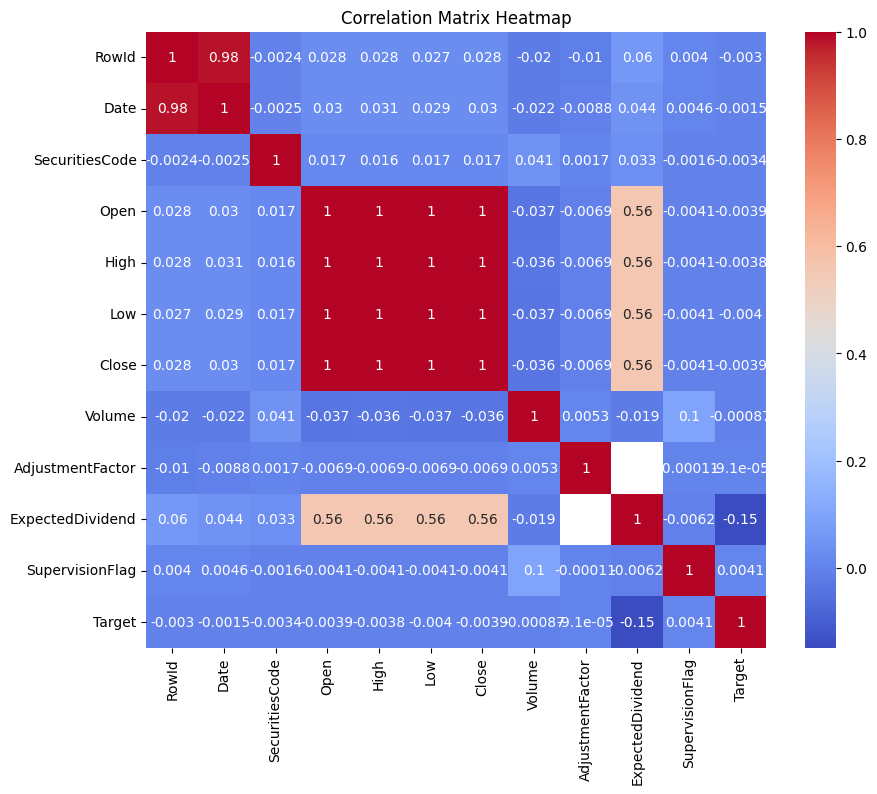

In [23]:
# Correlation matrix. Understanding how different numerical variables relate to each other can be insightful.
correlation_matrix = df.corr()

# Heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [24]:

# Missing Data
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 RowId                     0
Date                      0
SecuritiesCode            0
Open                   7608
High                   7608
Low                    7608
Close                  7608
Volume                    0
AdjustmentFactor          0
ExpectedDividend    2313666
SupervisionFlag           0
Target                  238
dtype: int64


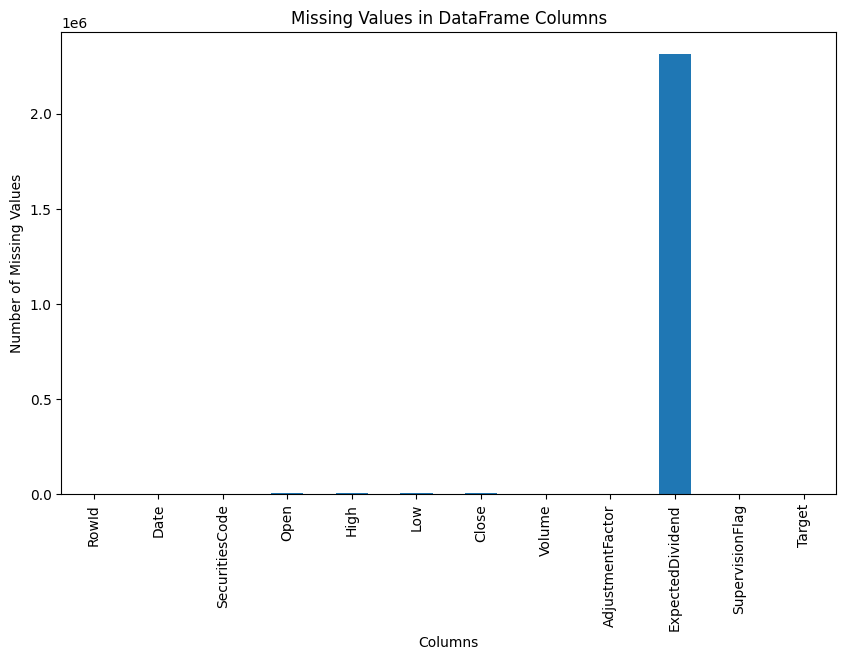

In [32]:
import matplotlib.pyplot as plt
import pandas as pd


# Count missing values in each column
missing_values_count = df.isnull().sum()

# Create a bar plot to visualize missing values
plt.figure(figsize=(10, 6))
missing_values_count.plot(kind='bar')
plt.title('Missing Values in DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()


KeyboardInterrupt: 

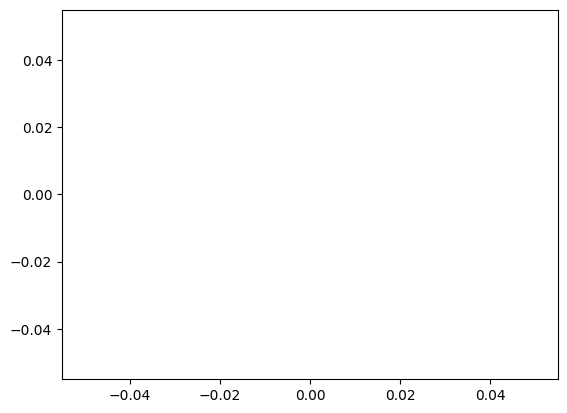

In [33]:
########### Assess Distribution and Missingness


import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for numeric columns
for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

In [25]:
df.drop(columns=['ExpectedDividend'], inplace=True)


In [26]:
# Calculate median for each column
median_open = df['Open'].median()
median_high = df['High'].median()
median_low = df['Low'].median()
median_close = df['Close'].median()


# Fill missing values with median
df['Open'].fillna(median_open, inplace=True)
df['High'].fillna(median_high, inplace=True)
df['Low'].fillna(median_low, inplace=True)
df['Close'].fillna(median_close, inplace=True)

In [27]:
# Recheck missingness
print("Missing Data After Imputation:\n", df.isnull().sum())

Missing Data After Imputation:
 RowId                 0
Date                  0
SecuritiesCode        0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
AdjustmentFactor      0
SupervisionFlag       0
Target              238
dtype: int64


In [28]:
# Define a function to detect outliers based on the IQR method
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Apply outlier detection
outliers_open = detect_outliers(df['Open']).sum()
outliers_high = detect_outliers(df['High']).sum()
outliers_low = detect_outliers(df['Low']).sum()
outliers_close = detect_outliers(df['Close']).sum()
outliers_volume = detect_outliers(df['Volume']).sum()
outliers_adjustment_factor = detect_outliers(df['AdjustmentFactor']).sum()


outliers_summary = {
    'Open Outliers': outliers_open,
    'High Outliers': outliers_high,
    'Low Outliers': outliers_low,
    'Close Outliers': outliers_close,
    'Volume Outliers': outliers_volume,
    'AdjustmentFactor Outliers': outliers_adjustment_factor

}

outliers_summary

{'Open Outliers': 145183,
 'High Outliers': 145803,
 'Low Outliers': 144944,
 'Close Outliers': 145371,
 'Volume Outliers': 308239,
 'AdjustmentFactor Outliers': 730}

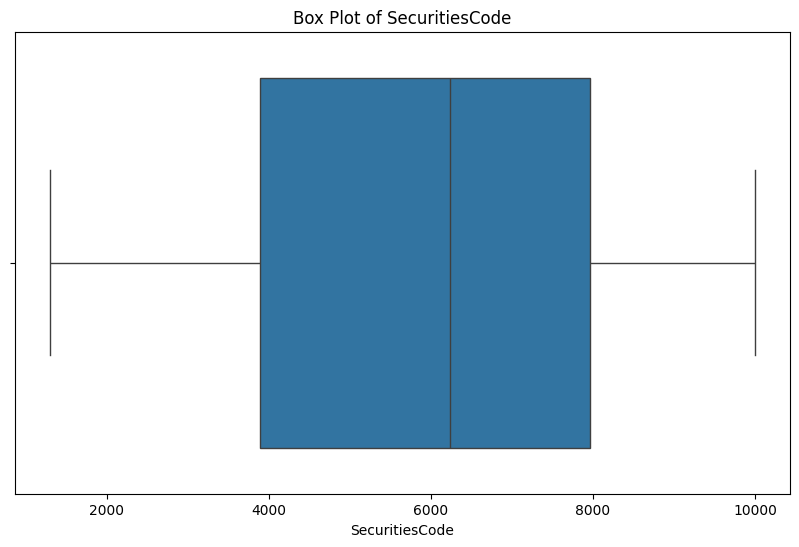

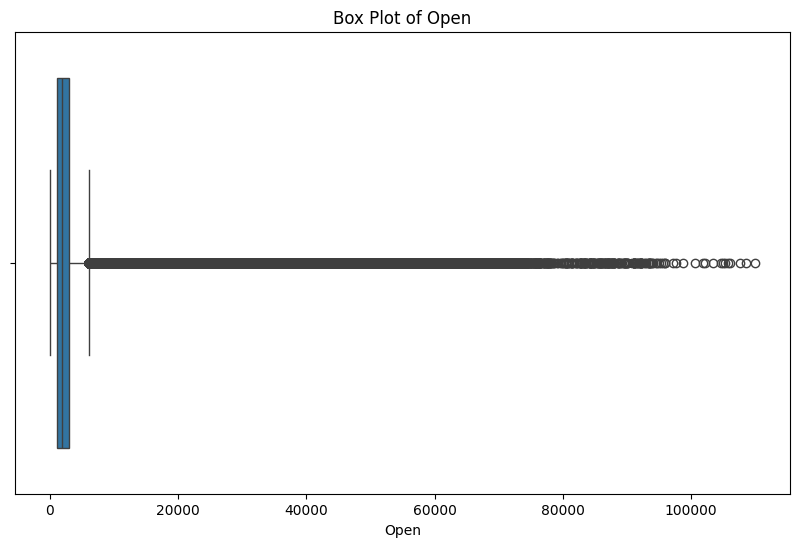

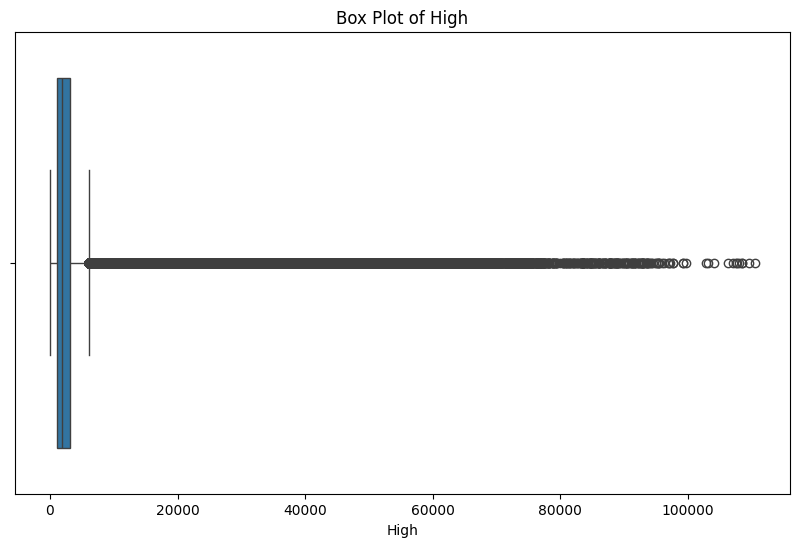

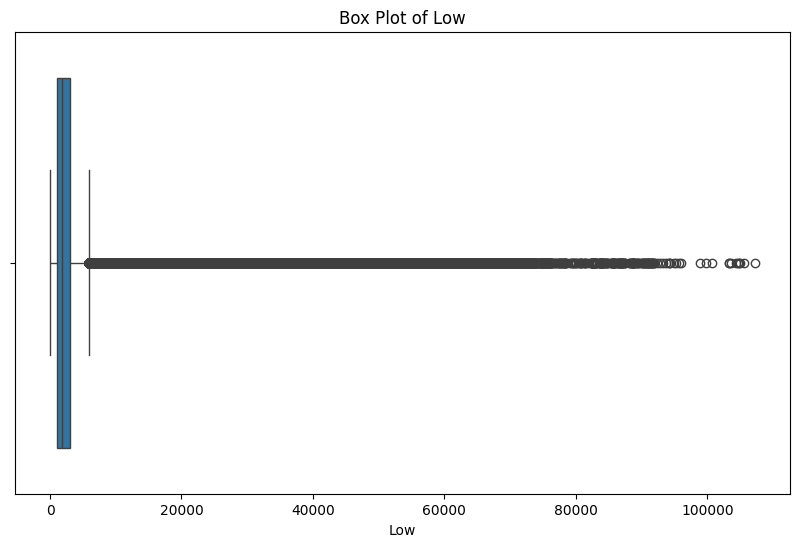

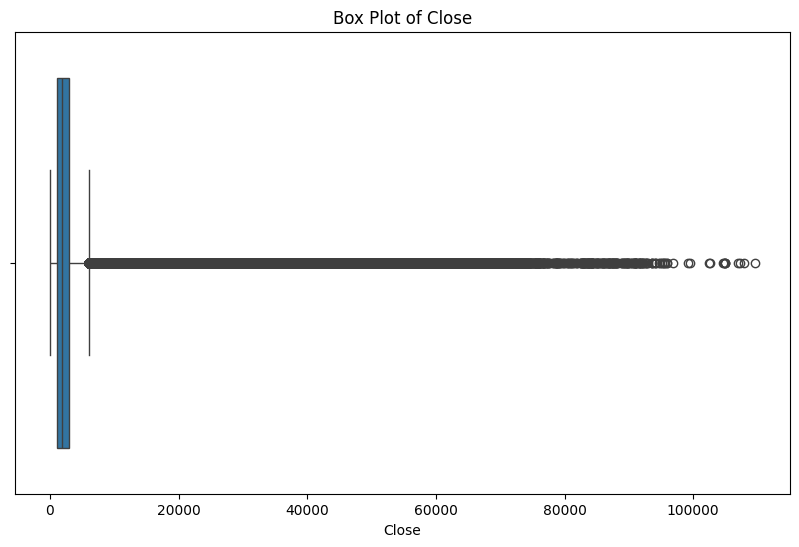

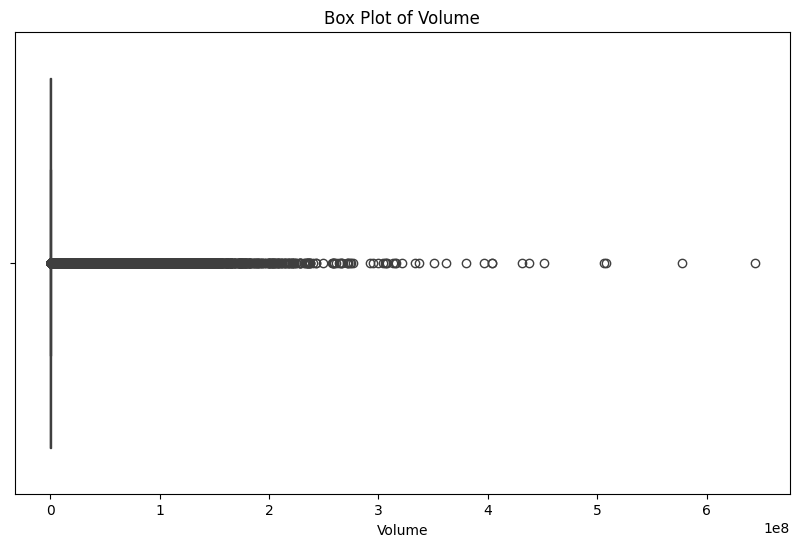

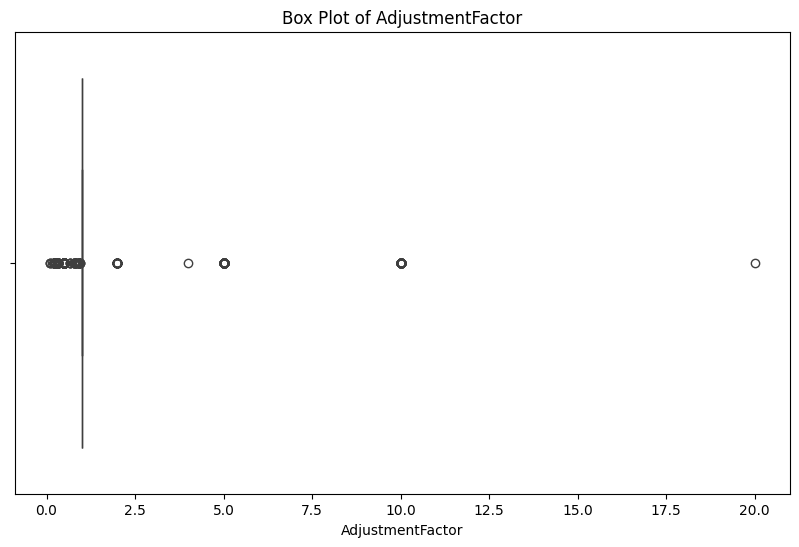

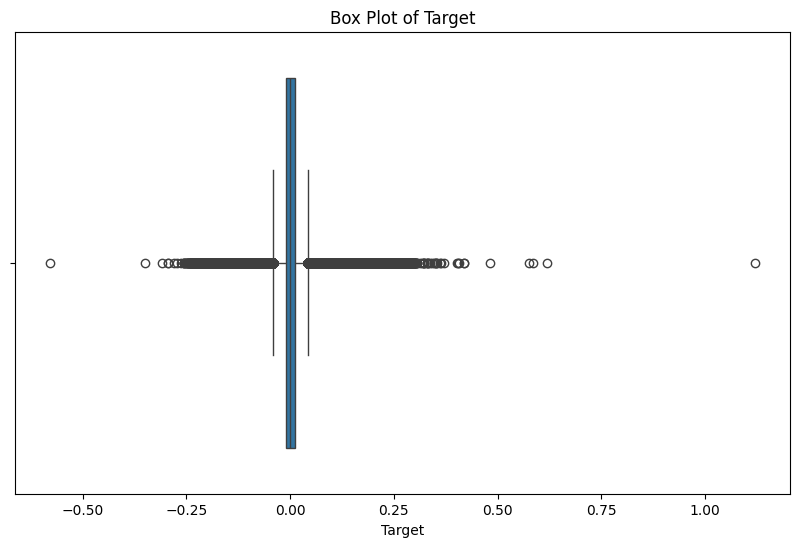

In [38]:
# Creating box plots for numerical variables
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [29]:
import pandas as pd



# Summary statistics for the 'Volume' column
volume_stats = df['Volume'].describe()

# Summary statistics for the 'AdjustmentFactor' column
adjustment_factor_stats = df['AdjustmentFactor'].describe()

# Display summary statistics
print("Summary Statistics for Volume Column:")
print(volume_stats)
print("\nSummary Statistics for AdjustmentFactor Column:")
print(adjustment_factor_stats)

# Skewness and kurtosis for both columns
volume_skewness = df['Volume'].skew()
volume_kurtosis = df['Volume'].kurtosis()

adjustment_factor_skewness = df['AdjustmentFactor'].skew()
adjustment_factor_kurtosis = df['AdjustmentFactor'].kurtosis()

print("\nSkewness for Volume Column:", volume_skewness)
print("Kurtosis for Volume Column:", volume_kurtosis)

print("\nSkewness for AdjustmentFactor Column:", adjustment_factor_skewness)
print("Kurtosis for AdjustmentFactor Column:", adjustment_factor_kurtosis)


Summary Statistics for Volume Column:
count    2.332531e+06
mean     6.919366e+05
std      3.911256e+06
min      0.000000e+00
25%      3.030000e+04
50%      1.071000e+05
75%      4.021000e+05
max      6.436540e+08
Name: Volume, dtype: float64

Summary Statistics for AdjustmentFactor Column:
count    2.332531e+06
mean     1.000508e+00
std      6.773040e-02
min      1.000000e-01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.000000e+01
Name: AdjustmentFactor, dtype: float64

Skewness for Volume Column: 36.042606002811546
Kurtosis for Volume Column: 2368.1649879155293

Skewness for AdjustmentFactor Column: 122.99565467169053
Kurtosis for AdjustmentFactor Column: 17008.27380321588


In [30]:
# Removing outliers from volume column

#Step 1: Calculate IQR
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter DataFrame to exclude outliers
df_filtered = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]




In [31]:
# Summary statistics before outlier removal
print("Summary Statistics for Volume Column (Before):")
print(df['Volume'].describe())

# Summary statistics after outlier removal
print("\nSummary Statistics for Volume Column (After):")
print(df_filtered['Volume'].describe())

Summary Statistics for Volume Column (Before):
count    2.332531e+06
mean     6.919366e+05
std      3.911256e+06
min      0.000000e+00
25%      3.030000e+04
50%      1.071000e+05
75%      4.021000e+05
max      6.436540e+08
Name: Volume, dtype: float64

Summary Statistics for Volume Column (After):
count    2.024292e+06
mean     1.686656e+05
std      2.117761e+05
min      0.000000e+00
25%      2.470000e+04
50%      7.830000e+04
75%      2.249000e+05
max      9.598000e+05
Name: Volume, dtype: float64


In [ ]:
# Histograms after handling outliers
for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col} After Handling Outliers')
    plt.show()

In [32]:
import numpy as np

# Log transformation for Volume column
df['Volume_Log'] = np.log(df['Volume'])

# Display the first few rows to show all columns including the log-transformed Volume
print(df.head())


           RowId       Date  SecuritiesCode    Open    High     Low   Close  \
0  20170104_1301 2017-01-04            1301  2734.0  2755.0  2730.0  2742.0   
1  20170104_1332 2017-01-04            1332   568.0   576.0   563.0   571.0   
2  20170104_1333 2017-01-04            1333  3150.0  3210.0  3140.0  3210.0   
3  20170104_1376 2017-01-04            1376  1510.0  1550.0  1510.0  1550.0   
4  20170104_1377 2017-01-04            1377  3270.0  3350.0  3270.0  3330.0   

    Volume  AdjustmentFactor  SupervisionFlag    Target  Volume_Log  
0    31400               1.0            False  0.000730   10.354563  
1  2798500               1.0            False  0.012324   14.844594  
2   270800               1.0            False  0.006154   12.509136  
3    11300               1.0            False  0.011053    9.332558  
4   150800               1.0            False  0.003026   11.923710  


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [33]:
# Min-Max Scaling (Normalization)
def min_max_scaling(feature):
    min_val = feature.min()
    max_val = feature.max()
    return (feature - min_val) / (max_val - min_val)

# Z-score Normalization (Standardization)
def z_score_normalization(feature):
    mean = feature.mean()
    std_dev = feature.std()
    return (feature - mean) / std_dev

# Apply Min-Max Scaling and Z-score Normalization to the dataset
normalized_df = pd.DataFrame()
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        normalized_df[col + '_minmax'] = min_max_scaling(df[col])
        normalized_df[col + '_zscore'] = z_score_normalization(df[col])

# Display the normalized dataset
print(normalized_df.head())

   SecuritiesCode_minmax  SecuritiesCode_zscore  Open_minmax  Open_zscore  \
0               0.000000              -1.910785     0.024742     0.039769   
1               0.003565              -1.897891     0.005039    -0.566676   
2               0.003680              -1.897475     0.028526     0.156243   
3               0.008625              -1.879589     0.013608    -0.302931   
4               0.008740              -1.879173     0.029617     0.189841   

   High_minmax  High_zscore  Low_minmax  Low_zscore  Close_minmax  \
0     0.024800     0.036263    0.025348    0.048551      0.024905   
1     0.005078    -0.566714    0.005131   -0.565678      0.005085   
2     0.028918     0.162171    0.029173    0.164764      0.029178   
3     0.013893    -0.297187    0.013966   -0.297254      0.014023   
4     0.030185     0.200913    0.030386    0.201612      0.030273   

   Close_zscore  Volume_minmax  Volume_zscore  AdjustmentFactor_minmax  \
0      0.042154       0.000049      -0.168881   

In [34]:
# One-hot encode categorical features
encoded_df = pd.get_dummies(df, columns=['SupervisionFlag'])

# Display the encoded DataFrame
print(encoded_df.head())

           RowId       Date  SecuritiesCode    Open    High     Low   Close  \
0  20170104_1301 2017-01-04            1301  2734.0  2755.0  2730.0  2742.0   
1  20170104_1332 2017-01-04            1332   568.0   576.0   563.0   571.0   
2  20170104_1333 2017-01-04            1333  3150.0  3210.0  3140.0  3210.0   
3  20170104_1376 2017-01-04            1376  1510.0  1550.0  1510.0  1550.0   
4  20170104_1377 2017-01-04            1377  3270.0  3350.0  3270.0  3330.0   

    Volume  AdjustmentFactor    Target  Volume_Log  SupervisionFlag_False  \
0    31400               1.0  0.000730   10.354563                   True   
1  2798500               1.0  0.012324   14.844594                   True   
2   270800               1.0  0.006154   12.509136                   True   
3    11300               1.0  0.011053    9.332558                   True   
4   150800               1.0  0.003026   11.923710                   True   

   SupervisionFlag_True  
0                 False  
1         

In [35]:
# Drop the specified columns
df = df.drop(columns=['RowId', 'SupervisionFlag'])

In [36]:
print(df.columns)

Index(['Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close', 'Volume',
       'AdjustmentFactor', 'Target', 'Volume_Log'],
      dtype='object')


## Building our first model

In [57]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Assuming you've already defined features and target column name ('Target')
features = ['Open', 'High', 'Low', 'Volume', 'AdjustmentFactor']

# Splitting the smaller subset data into features (X) and target (y)
X = subset_df[features].values
y = subset_df['Target'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining and compiling the model
model = Sequential([
    Dense(32, input_shape=(len(features),), activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10)


Epoch 1/100
18661/18661 [==============================] - 41s 2ms/step - loss: nan - accuracy: 0.0379 - val_loss: nan - val_accuracy: 0.0380
Epoch 2/100
18661/18661 [==============================] - 45s 2ms/step - loss: nan - accuracy: 0.0380 - val_loss: nan - val_accuracy: 0.0380
Epoch 3/100
18661/18661 [==============================] - 45s 2ms/step - loss: nan - accuracy: 0.0380 - val_loss: nan - val_accuracy: 0.0380
Epoch 4/100
18661/18661 [==============================] - 44s 2ms/step - loss: nan - accuracy: 0.0380 - val_loss: nan - val_accuracy: 0.0380
Epoch 5/100
18661/18661 [==============================] - 40s 2ms/step - loss: nan - accuracy: 0.0380 - val_loss: nan - val_accuracy: 0.0380
Epoch 6/100
18661/18661 [==============================] - 45s 2ms/step - loss: nan - accuracy: 0.0380 - val_loss: nan - val_accuracy: 0.0380
Epoch 7/100
18661/18661 [==============================] - 45s 2ms/step - loss: nan - accuracy: 0.0380 - val_loss: nan - val_accuracy: 0.0380
Epoch 

In [64]:
import pandas as pd

# Load your dataset into a DataFrame
# Assuming you've already loaded your dataset into the DataFrame stock_prices_df

# Specify the fraction of data you want to sample (e.g., 10%)
subset_fraction = 0.1

# Create a smaller subset by randomly sampling a fraction of your data
subset_df = stock_prices_df.sample(frac=subset_fraction, random_state=42)

# Display information about the subset DataFrame
print("Shape of subset DataFrame:", subset_df.shape)
print(subset_df.head())


Shape of subset DataFrame: (233253, 12)
                 RowId       Date  SecuritiesCode    Open    High     Low  \
1500414  20200323_3421 2020-03-23            3421  1075.0  1113.0  1026.0   
132482   20170414_9369 2017-04-14            9369  2510.0  2510.0  2439.0   
544034   20180307_4680 2018-03-07            4680  1755.0  1755.0  1700.0   
379982   20171026_7229 2017-10-26            7229  2575.0  2620.0  2575.0   
1813155  20201112_3421 2020-11-12            3421  1398.0  1399.0  1387.0   

          Close  Volume  AdjustmentFactor  SupervisionFlag    Target  \
1500414  1104.0   27700               1.0            False  0.064204   
132482   2439.0   24400               1.0            False  0.000405   
544034   1708.0  712300               1.0            False -0.029965   
379982   2610.0    5300               1.0            False  0.003494   
1813155  1396.0    7900               1.0            False  0.016715   

         Volume_Log  
1500414   10.229188  
132482    10.102338 

In [65]:

features = ['Date', 'Open', 'High', 'Low', 'Volume', 'AdjustmentFactor']

# Selecting the features from the DataFrame
X_Train = stock_prices_df[features]

# Printing the first few rows of X_train to verify
print(X_Train.head())


        Date    Open    High     Low   Volume  AdjustmentFactor
0 2017-01-04  2734.0  2755.0  2730.0    31400               1.0
1 2017-01-04   568.0   576.0   563.0  2798500               1.0
2 2017-01-04  3150.0  3210.0  3140.0   270800               1.0
3 2017-01-04  1510.0  1550.0  1510.0    11300               1.0
4 2017-01-04  3270.0  3350.0  3270.0   150800               1.0


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=X_Train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [67]:
X_Train.shape[1]

6

In [68]:
# 1st Hidde layer
X_Train.shape[1]*12 + 12

84

In [69]:
# 2nd Hidden layer
12 * 8 + 8

104

In [70]:
# 3rd Hidden layer
8 * 8 + 8

72

In [71]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 12)                84        
                                                                 
 dense_31 (Dense)            (None, 8)                 104       
                                                                 
 dense_32 (Dense)            (None, 8)                 72        
                                                                 
 dense_33 (Dense)            (None, 1)                 9         
                                                                 
Total params: 269 (1.05 KB)
Trainable params: 269 (1.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
from keras.models import Model
from keras.layers import Dense, Input

in_x = Input(shape = X_Train.shape[1:])
x = Dense(12, input_dim=X_Train.shape[1], activation='relu')(in_x)
x = Dense(8, activation='relu')(x)
x = Dense(8, activation='relu')(x)
out_x = Dense(1, activation='sigmoid')(x)

model = Model(in_x,out_x)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_34 (Dense)            (None, 12)                84        
                                                                 
 dense_35 (Dense)            (None, 8)                 104       
                                                                 
 dense_36 (Dense)            (None, 8)                 72        
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 269 (1.05 KB)
Trainable params: 269 (1.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
from keras.activations import relu
import keras

in_x = Input(shape = X_Train.shape[1:])
x = keras.layers.Normalization(axis=-1)(in_x)
x = Dense(12, input_dim=X_Train.shape[1], activation='relu')(in_x)
x = Dense(8)(x)
x = relu(x)
out_x = Dense(1, activation='sigmoid')(x)

model = Model(in_x,out_x)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_38 (Dense)            (None, 12)                84        
                                                                 
 dense_39 (Dense)            (None, 8)                 104       
                                                                 
 tf.nn.relu_2 (TFOpLambda)   (None, 8)                 0         
                                                                 
 dense_40 (Dense)            (None, 1)                 9         
                                                                 
Total params: 197 (788.00 Byte)
Trainable params: 197 (788.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
print (history.history)

{'loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'accuracy': [0.03793099895119667, 0.038006022572517395, 0.038006022572517395, 0.038006022572517395, 0.038006022572517395, 0.038006022572517395, 0.038006022572517395, 0.038006022572517395, 0.038006022572517395, 0.038006022572517395, 0.038006022572517395, 0.038006022572517395, 0.038006022572517395, 0.038006022572517395, 0.038006022572517395, 0.038006022572517395, 0.038006022572517395, 0.038006022572517395, 0.038006022572517395, 0.038006022572517395, 0.038006022572517395, 0.0380060225725

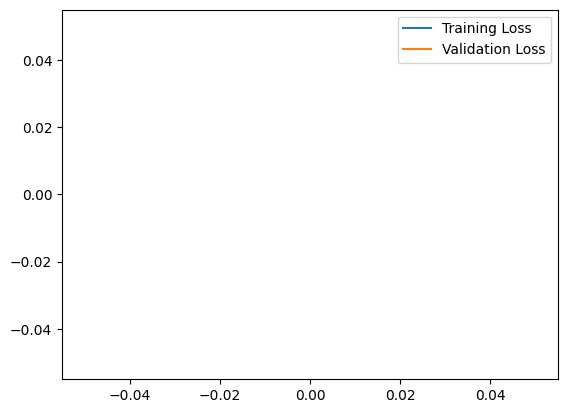

In [76]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

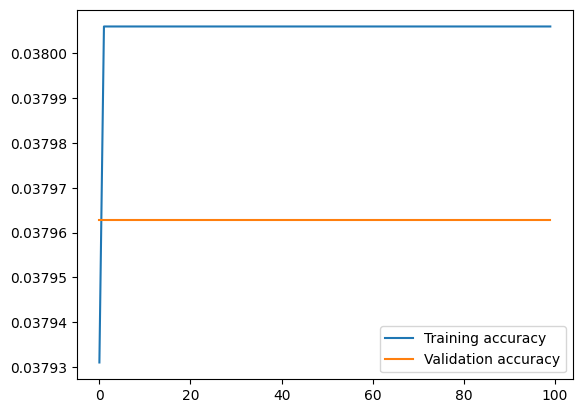

In [77]:
plt.plot(range(len(history.history["accuracy"])),history.history["accuracy"],label="Training accuracy")
plt.plot(range(len(history.history["val_accuracy"])),history.history["val_accuracy"],label="Validation accuracy")
plt.legend()

In [79]:
from keras.models import Sequential
from keras.layers import Dense

# Define your model with input shape (5,)
model = Sequential([
    Dense(32, input_shape=(5,), activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the model
scores = model.evaluate(X_test, y_test)
print(scores)


1458/1458 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0042
[nan, 0.004179974552243948]


In [81]:
scores = model.evaluate(X_test, y_test)
print(scores)

1458/1458 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0042
[nan, 0.004179974552243948]


In [82]:
model.predict(X_test)

1458/1458 [==============================] - 2s 1ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [84]:
import numpy as np

In [86]:
X_test_0 = X_test[(y_test==0).to_numpy()]
X_test_0 = X_test[y_test == 0]


AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'